In [39]:
from typing import List
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_PATH = '../data/archive'

In [40]:
def get_classes(path: str) -> List[str]:
    return [k.split('/')[-1] for k, _, _ in os.walk(path) if not '_background_noise_' in k and 'archive/' in k]

In [42]:
def create_df(classes: List[str], path: str) -> pd.DataFrame:
    data = []
    for cls in classes:
        files = glob.glob(os.path.join(BASE_PATH, cls, '*'))
        for file in files:
            splitted = file.split('/')[-1].split('_')
            record = file, label, speaker, nohash, utterance_id = file, cls, splitted[0], splitted[1], splitted[2][:-4]
            data.append(record)
    df = pd.DataFrame(data=data, columns=['path', 'label', 'speaker_id', 'hash', 'utterance_id'])
    return df

In [43]:
classes = get_classes(BASE_PATH)

In [44]:
df = create_df(classes, BASE_PATH)

In [31]:
print(f'Unique speakers: {len(pd.unique(df["speaker_id"]))}')
print(f'Avg annotations per speaker {df.groupby("speaker_id").count()["path"].mean()}, +- {df.groupby("speaker_id").count()["path"].std()}')

Unique speakers: 1881
Avg annotations per speaker 34.40776182881446, +- 23.96546991470449


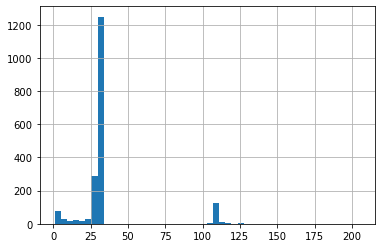

In [36]:
df_gr = df.groupby('speaker_id').count()['path']
df_gr.hist(bins=50)
plt.show()

In [37]:
print(f'Unique labels: {len(pd.unique(df["label"]))}')
print(f'Avg annotations per label {df.groupby("label").count()["path"].mean()}, +- {df.groupby("label").count()["path"].std()}')

Unique labels: 30
Avg annotations per label 2157.366666666667, +- 302.25594125341604


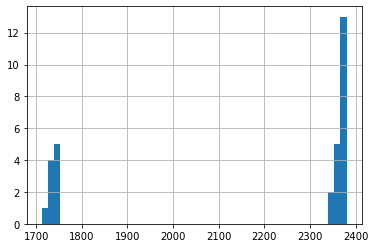

In [38]:
df_gr = df.groupby('label').count()['path']
df_gr.hist(bins=50)
plt.show()

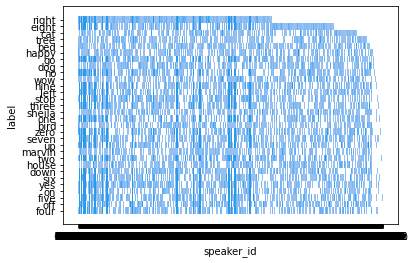

In [50]:
sns.histplot(x=df['speaker_id'], y=df['label'])
plt.show()

In [ ]:
import pytorch_lightning as pl